# **Regresión Lineal en Python**

***

# Regresión Lineal Simple

El objetivo de un modelo de regresión es explicar la relación que existe entre una
variable dependiente (también conocida como **variable respuesta u objetivo** -> Y) y un conjunto de variables independientes (**variables explicativas** -> X1,..., Xn).

En el modelo de regresión lineal simple se tiene una única variable explicativa X y tiene la siguiente expresión:



$$
Y = \alpha + \beta X + \epsilon
$$

Esta expresión es como la fórmula de una recta en un plano.


Por ejemplo: 

Si queremos estimar la altura de una persona a través de su peso, el modelo tendría la siguiente forma:

Variable ojetivo: Altura

Variable explicativa: Peso

$$
Altura = \alpha + \beta*Peso + \epsilon
$$

En donde:

- **Alpha** es la ordenada en el origen o **constante** (el valor que toma la altura cuando el peso vale 0)

- **Beta** es la **pendiente** de la recta (e indica cómo cambia la altura al incrementar el peso en una unidad) 

- **Epsilon** es una variable que incluye un conjunto grande de factores (variables), cada uno de los cuales influye en la respuesta sólo en pequeña magnitud, a la que llamaremos **error**.

Nuestro trabajo consiste en encontrar el valor que toma Alpha y Beta.

Para esta guía utilizaremos una base de datos de la US Army con información antropométrica de sus soldados (altura, peso, edad, sexo, etc.)

# Descripción Base de Datos

Lo primero que debemos hacer a la hora de enfrentarnos a cualquier problema es entender un poco la base de datos, para ello al menos hay que tener clara su estructura, la dimensión y conocer los valores que puede tomar cada variable.

Muestra de algunas variables de nuestra base de datos:

In [1]:
# Importamos la librería pandas
import pandas as pd

# Lectura BBDD
male = pd.read_csv("ANSUR/ANSUR II MALE Public.csv", encoding = 'iso-8859-1')
female = pd.read_csv("ANSUR/ANSUR II FEMALE Public.csv", encoding = 'iso-8859-1')

In [2]:
# Juntamos las dos bbdd
data = pd.concat([male, female], axis = 0)

In [3]:
# Corregimos la variable Altura y Peso
data['stature'] = data['stature']/10
data['weightkg'] = data['weightkg']/10


In [4]:
# Cogemos una muestra aleatoria y la mostramos
data.iloc[:, [94,104,91,75]].sample(10)

,Gender,Age,weightkg,stature
256,Male,28,93.3,167.8
1540,Female,31,64.4,158.5
862,Male,40,87.8,185.3
1119,Female,37,77.1,166.6
2186,Male,25,75.4,177.4
192,Male,30,103.3,178.4
3168,Male,28,82.8,180.6
748,Male,38,99.5,182.1
2529,Male,26,69.5,170.7
848,Female,37,65.9,158.6


Con una muestra muchas veces podemos detectar a simple vista si hay observaciones con datos faltantes o cualquier tipo de incongruencia en nuestra base de datos.

El número total de observaciones que tenemos son:

In [5]:
data.shape[0]

6068

## Histograma

Un histograma es una representación gráfica de una variable en forma de barras, donde la altura de cada barra es proporcional a la frecuencia de los valores representados.

El histograma nos puede servir para hacernos una idea de la distribución de cada variable numérica y para detectar valores atípicos.

En nuestro caso de estudio la distribución de las variables altura y peso son: 

In [6]:
# Importamos una de las librerías más empleada para graficar
import matplotlib.pyplot as plt


# Frecuencia de la altura
figure = plt.figure(figsize = (12,6))
plt.hist(data['stature'])
plt.title('Histograma de Altura');
plt.xlabel('Altura en cm');
plt.ylabel('Frecuencia');

print(data['stature'].describe())

count    6068.000000
mean      171.440606
std         9.001534
min       140.900000
25%       165.175000
50%       171.900000
75%       177.900000
max       199.300000
Name: stature, dtype: float64


count    6068.000000
mean       79.709394
std        15.652816
min        35.800000
25%        68.200000
50%        78.500000
75%        89.600000
max       144.200000
Name: weightkg, dtype: float64


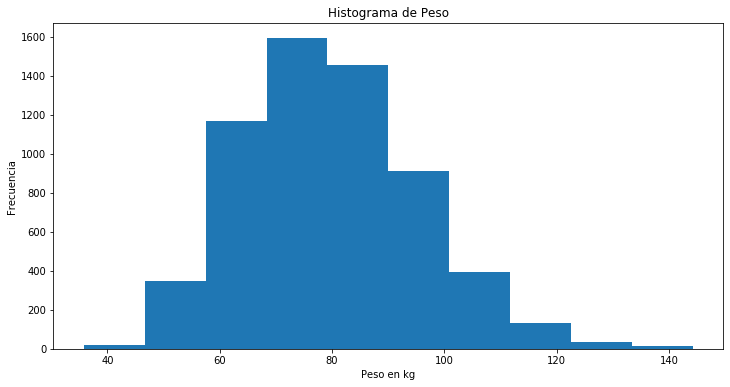

In [7]:
# Frecuencia del Peso
figure = plt.figure(figsize = (12,6))
plt.hist(data['weightkg'])
plt.title('Histograma de Peso');
plt.xlabel('Peso en kg');
plt.ylabel('Frecuencia');

print(data['weightkg'].describe())


También podemos ver la distribución de la Altura y Peso para cada Género.


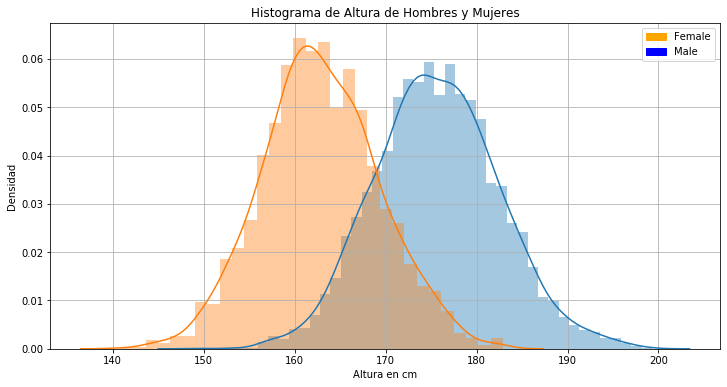

In [8]:
# Importamos otra de las librerías que permiten graficar
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.lines as mplines


plt.figure(figsize=(12,6))
g1 = sns.distplot(data[data['Gender'] == 'Male']['stature'])
g2 = sns.distplot(data[data['Gender'] == 'Female']['stature'])
plt.title('Histograma de Altura de Hombres y Mujeres')
plt.xlabel('Altura en cm')
plt.ylabel('Densidad')
female_patch = mpatches.Patch(color='orange', label='Female')
male_patch = mpatches.Patch(color='blue', label='Male')
plt.legend(handles=[female_patch, male_patch])
plt.grid(True)

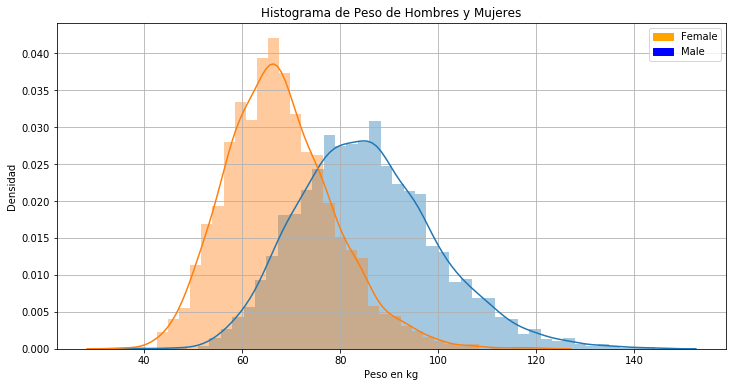

In [9]:
plt.figure(figsize=(12,6))
g1 = sns.distplot(data[data['Gender'] == 'Male']['weightkg'])
g2 = sns.distplot(data[data['Gender'] == 'Female']['weightkg'])
plt.title('Histograma de Peso de Hombres y Mujeres')
plt.xlabel('Peso en kg')
plt.ylabel('Densidad')
female_patch = mpatches.Patch(color='orange', label='Female')
male_patch = mpatches.Patch(color='blue', label='Male')
plt.legend(handles=[female_patch, male_patch])
plt.grid(True)

***
# Linealidad

Como hemos visto la relación que buscamos tiene forma de una recta, por tanto, para ver si tiene sentido hacer un modelo de regresión lineal simple es buena idea dibujar un diagrama de dispersión y ver si el diagrama puede ser representado por una recta, en caso afirmativo iremos bien encaminados.

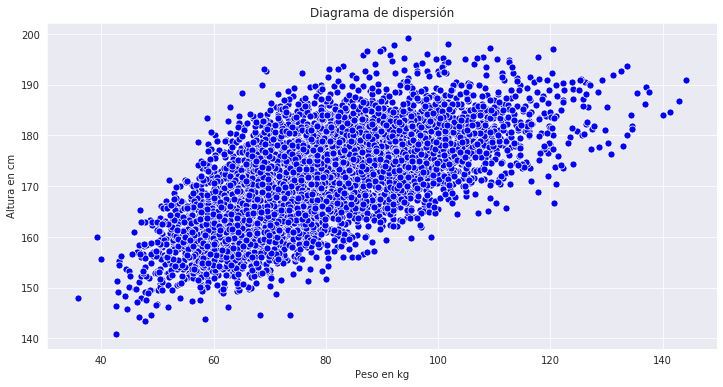

In [10]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(12,6))
    sns.scatterplot(data = data, x = 'weightkg', y = 'stature', color = 'blue', s = 50)
    plt.title('Diagrama de dispersión')
    plt.ylabel('Altura en cm')
    plt.xlabel('Peso en kg')
    plt.grid(True)

Un ejemplo donde directamente no tiene sentido hacer regresión lineal:


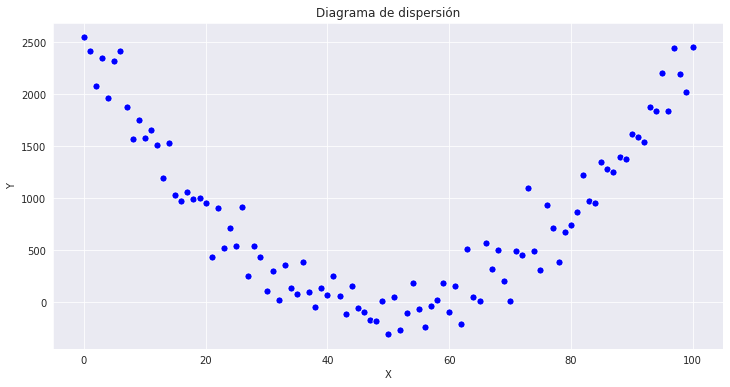

In [11]:
# Importamos libreria numpy
import numpy as np

# Genero un dataframe de ejemplo
x = np.arange(0, 101)
y = (np.arange(-50, 51)**2).astype(np.float) + np.random.normal(0, 200, 101)
ejemplo = pd.DataFrame(np.array([x, y]).T, columns=['X','Y'])

with sns.axes_style('darkgrid'):
    plt.figure(figsize=(12,6))
    sns.scatterplot(data = ejemplo, x = 'X', y = 'Y', color = 'blue', s = 50)
    plt.title('Diagrama de dispersión')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.grid(True)

En el diagrama anterior vemos que no existe una linea recta que se pueda ajustar adecuadamente a todos los puntos.

***
# Modelo en Python

Para hacer un modelo de regresión simple en Python utilizaremos la clase OLS (Ordinary Least Square) de la libreria statsmodels.

Para entrenar el modelo es necesario añadirle a la variable independiente una constante de valor 1, que servirá para ajustar el intercept. Para relacionar la altura a través del peso, la expresión sería la siguiente:


In [12]:
# Importamos statsmodels. Una libreria para generar modelos y que permite obtener 
# estadísticos que usaremos para validarlos
import statsmodels.api as sm

mod = sm.OLS(data['stature'], sm.add_constant(data['weightkg'].values.reshape(-1,1))).fit()
print(mod.summary())


                            OLS Regression Results                            
Dep. Variable:                stature   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     4688.
Date:                Sun, 10 May 2020   Prob (F-statistic):               0.00
Time:                        23:35:11   Log-Likelihood:                -20206.
No. Observations:                6068   AIC:                         4.042e+04
Df Residuals:                    6066   BIC:                         4.043e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.1749      0.450    313.401      0.0

En la parte de Coefficients la columna coef nos da la estimación de los parámetros del modelo (alpha y beta) y con ellos ya podemos obtener la fórmula del modelo, en este caso:

$$
Altura = 141.17 + 0.3797*Peso
$$

141.17 es la estimación de la Altura cuando el Peso vale 0.

0.3797 representa el incremento en la Altura cuando aumenta una unidad el Peso.

Con esta fórmula podemos estimar, por ejemplo, la altura de una persona que pese 75kg, en este caso la altura sería de 170cm.

Como podemos suponer este resultado es mediocre ya que hay variables importantes que no se están teniendo en cuenta (género, edad, etc.).


***
# Validación

Para dar el modelo por válido se tienen que cumplir varias cosas:

- R-cuadrado ajustado alto.
- Significatividad conjunta. (En Reg simple coincide con la individual)
- Significatividad individual.
- Errores independientes, homocedasticos (varianza constante) y normales.
- No hay valores influyentes u outliers.
- Especificación. No omitimos variables ni hay variables redundantes. (Reg múltiple)


## R-cuadrado ajustado

Es un indicador de la variabilidad explicada por el modelo, toma valores entre 0 y 1, cuanto más próximo a 1 mejor.

In [13]:
mod.rsquared_adj

0.4358562757060296

En el summary del modelo aparece como Adjusted R-squared y en nuestro modelo tiene un valor de 0.4359 que es un valor bajo.

Esto puede indicarnos falta de linealidad o que es necesario añadir más variables al modelo para explicar mejor la variabilidad de la Altura.

## Significatividad individual y conjunta

La última columna de Coefficients Pr(>|t|) en el summary del modelo es el p-valor y nos indica si la variable es significativa en el modelo, normalmente este valor tiene que ser menor de 0.05 para considerarse significativo, aunque depende del problema que se esta estudiando.

El p-valor nos indica la probabilidad de que ocurra un resultado extremo o más extremo partiendo de una hipótesis (hipótesis nula). 


Por ejemplo, si generamos 100 números aleatorios con una distribución normal de media 3 y desviación típica 1 lo esperado es que esos números en una gráfica sean como el cuadrante 1 de la imagen de abajo, si por el contrario obtenemos algo parecido a los puntos del cuadrante 4, la probabilidad de que hayamos obtenido esa distribución o alguna más extrema (p-valor) es de solo 2.26e-09 (partiendo de la hipotesis nula de que los valores siguen nuestra distribución) por lo que al ser tan improbable rechazamos la idea de que los números vengan de nuestra distribución con media de 3 y desviación típica de 1.

In [14]:
np.seed=12345

# Genero un dataframe para graficar el p-valor
ejeX = np.arange(1,101)
distEsp = np.random.normal(size = 100) + 3
distOtra = np.random.normal(size = 100) + 3
distPbajo = np.arange(-49,51)*.0075 + 3 + np.random.normal(size = 100)
distPalto = np.arange(-49,51)*.025 + 3 + np.random.normal(size = 100)
graf_p = pd.DataFrame(np.array([ejeX, distEsp, distOtra, distPbajo, distPalto]).T, columns=['ejeX', 'distEsp', 'distOtra', 
                                                                                           'distPbajo','distPalto'])  


In [15]:
from sklearn.linear_model import LinearRegression

# Para cada uno de los grafos que se van a mostrar a continuación, creo sus representaciones utilizando la clase 
# LinearRegression de la libreria sklearn.linear_model

model_g2 = LinearRegression()
model_g2.fit(graf_p['ejeX'].values.reshape(-1,1), graf_p['distOtra'])
model_g2_representation = graf_p['ejeX'].values * model_g2.coef_[0] + model_g2.intercept_

model_g3 = LinearRegression()
model_g3.fit(graf_p['ejeX'].values.reshape(-1,1), graf_p['distPbajo'])
model_g3_representation = graf_p['ejeX'].values * model_g3.coef_[0] + model_g3.intercept_

model_g4 = LinearRegression()
model_g4.fit(graf_p['ejeX'].values.reshape(-1,1), graf_p['distPalto'])
model_g4_representation = graf_p['ejeX'].values * model_g4.coef_[0] + model_g4.intercept_



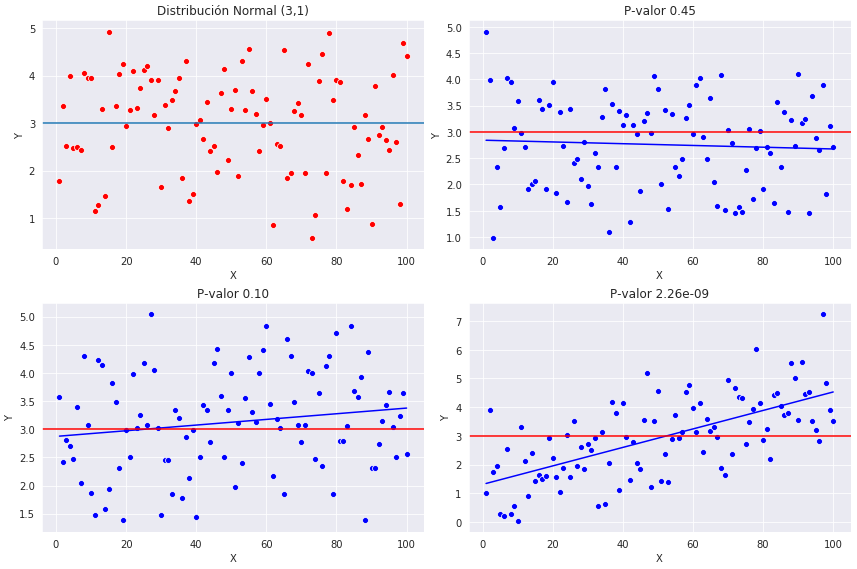

In [16]:

with sns.axes_style('darkgrid'):

    figure, ax = plt.subplots(2,2, figsize=(12,8))
    g1 = sns.scatterplot(data = graf_p, x = ejeX, y = distEsp, color = 'red', ax = ax[0,0])
    g1.axhline(3)
    g1.set_title('Distribución Normal (3,1)')
    g1.set_xlabel('X')
    g1.set_ylabel('Y')
    g2 = sns.scatterplot(data = graf_p, x = ejeX, y = distOtra, color = 'blue', ax = ax[0,1])
    sns.lineplot( x = graf_p['ejeX'], y = model_g2_representation, color = 'blue', ax = ax[0,1])
    g2.axhline(3, color='red')
    g2.set_title('P-valor 0.45')
    g2.set_xlabel('X')
    g2.set_ylabel('Y')
    g3 = sns.scatterplot(data = graf_p, x = ejeX, y = distPbajo, color = 'blue', ax = ax[1,0])
    sns.lineplot( x = graf_p['ejeX'], y = model_g3_representation, color = 'blue', ax = ax[1,0])
    g3.axhline(3, color='red')
    g3.set_title('P-valor 0.10')
    g3.set_xlabel('X')
    g3.set_ylabel('Y')
    g4 = sns.scatterplot(data = graf_p, x = ejeX, y = distPalto, color = 'blue', ax = ax[1,1])
    sns.lineplot( x = graf_p['ejeX'], y = model_g4_representation, color = 'blue', ax = ax[1,1])
    g4.axhline(3, color='red')
    g4.set_title('P-valor 2.26e-09')
    g4.set_xlabel('X')
    g4.set_ylabel('Y')
    plt.tight_layout()



Las hipótesis nulas en el caso de nuestro modelo son:

- El coeficiente de Peso es igual a 0 (No influye en la Altura).

- La constante es igual a 0.

In [17]:
mod.summary2().tables[1]['P>|t|']

const    0.0
x1       0.0
Name: P>|t|, dtype: float64

En este caso la variable weightkg es claramente significativa con un p-valor = 0.

Quiere decir que rechazamos la hipótesis nula de nuestro modelo "El coeficiente de Peso es igual a 0" y por tanto el peso influye en la altura.


Al final del summary tenemos un p-value que nos indica la significación conjunta, en modelos de regresión lineal simple coincide con el p-valor de la variable explicativa pero en modelos de regresión múltiple es distinto y debe cumplirse la significatividad.

## Errores independientes, homocedasticos y normales

Los errores los podemos comprobar mediante 3 gráficos. 


In [18]:
# Importamos la libreria scipy que nos servirá para usar t-Student
import scipy.stats as stats

# Importamos ProbPlot para el segundo grafo
from statsmodels.graphics.gofplots import ProbPlot

# Función para generar los grafos necesarios
def get_error_graphs(mod):
    with sns.axes_style('darkgrid'):
        plt.figure(figsize=(6,6))
        sns.scatterplot(x = mod.fittedvalues, y = mod.resid, color = 'blue', s = 50)
        plt.title('Residuals vs Fitted')
        plt.ylabel('Residuals')
        plt.xlabel('Fitted values')
        plt.grid(True)
        
    with sns.axes_style('darkgrid'):
        QQ = ProbPlot(mod.get_influence().resid_studentized_internal)
        plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
        plot_lm_2.axes[0].set_title('Normal Q-Q')
        plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
        plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
        # Anotaciones
        abs_norm_resid = np.flip(np.argsort(np.abs(mod.get_influence().resid_studentized_internal)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            plot_lm_2.axes[0].annotate(i,
                                       xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                           mod.get_influence().resid_studentized_internal[i]))
        
        
    with sns.axes_style('darkgrid'):
        fig = plt.figure(figsize=(6,6));
        plt.scatter(mod.get_influence().hat_matrix_diag, mod.get_influence().resid_studentized_internal, alpha=0.5);
        sns.regplot(mod.get_influence().hat_matrix_diag, mod.get_influence().resid_studentized_internal,
                  scatter=False,
                  ci=False,
                  lowess=True,
                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
        fig.axes[0].set_xlim(0, max(mod.get_influence().hat_matrix_diag)+0.01)
        fig.axes[0].set_ylim(-4, pd.Series(mod.get_influence().resid_studentized_internal).sort_values(ascending=False).values[0] + 5)
        fig.axes[0].set_title('Residuals vs Leverage')
        fig.axes[0].set_xlabel('Leverage')
        fig.axes[0].set_ylabel('Standardized Residuals');
        Cook_1 = mplines.Line2D([0], [0], color='red', label='Cooks distance = 1', linestyle = '--')
        plt.legend(handles=[Cook_1])
        
        
        leverage_top_3 = np.flip(np.argsort(mod.get_influence().cooks_distance[0]), 0)[:3]

        for i in leverage_top_3:
            fig.axes[0].annotate(i,xy=(mod.get_influence().hat_matrix_diag[i], 
                                           mod.get_influence().resid_studentized_internal[i]))
        
        # Contorno para la distancia de Cook
        def graph(formula, x_range, label=None):
            x = x_range
            y = formula(x)
            plt.plot(x, y, label=label, lw=1, ls='--', color='red')

        p = len(mod.params) 

        graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
              np.linspace(0.001, 0.200, 50)) # distancia = 1





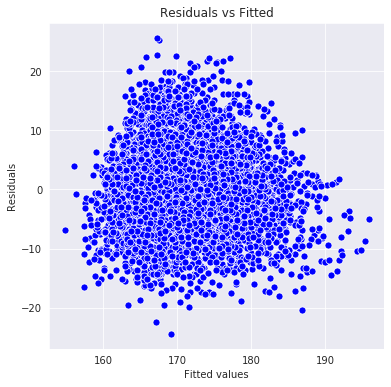

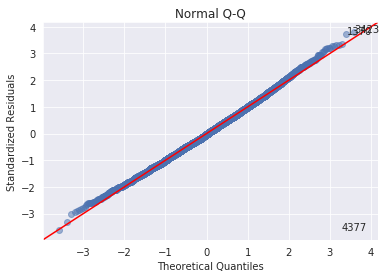

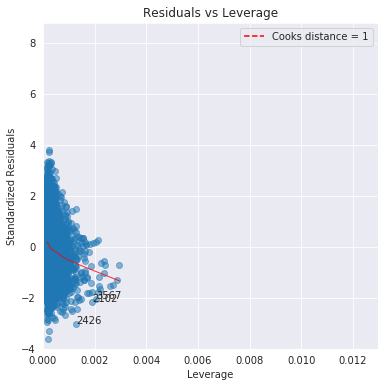

In [19]:
get_error_graphs(mod)



El primer gráfico nos muestra la distribución de los errores respecto a los valores ajustados, aquí podemos ver que no hay relación entre ellos (independientes) y que la varianza es más o menos constante (homocedasticidad)       

En el segundo gráfico cuando los puntos se ajustan bastante a la recta nos indica que los errores siguen una distribución normal.

En nuestro caso en general los puntos se ajustan bastante bien a la recta y por tanto los errores son normales.

## Valores influyentes

Los valores influyentes son aquellas observaciones que al quitarlas del modelo modifican considerablemente el valor de los coeficientes del modelo.

El último gráfico nos indica si existe algún valor influyente, si la distancia de Cook es mayor que 1 entonces es una observación influyente, en nuestro caso no tenemos ninguna observación influyente.

Es recomendable hacer otros chequeos para ver que no hay outliers en la base de datos y aplicar el sentido común (histogramas, gráfico de dispersión, etc.).

## Especificación

Un modelo bien específicado es aquel que no incluye variables redundantes ni deja sin meter variables relevantes para el modelo.

En este caso por el R-cuadrado sabemos que hay parte de la variabilidad de la Altura que no esta siendo explicada por el Peso y lo ideal sería añadir más variables para tener un modelo más completo (género, edad, etc.), esto se verá en la regresión lineal múltiple.


***
# Predicción

Por último, lo que realmente interesa del modelo es estimar la Altura de una persona en función de su Peso.

Para ello utilizaremos la función 'predict'

Por ejemplo para una persona de 70Kg tenemos:

In [20]:
pred = mod.get_prediction(np.array([1, 70]))

pred.summary_frame(alpha=0.05).loc[0,['mean', 'obs_ci_lower', 'obs_ci_upper']]

mean            167.753938
obs_ci_lower    154.498451
obs_ci_upper    181.009425
Name: 0, dtype: float64

Esto nos devuelve una estimación de la Altura (fit) y unos límites de intervalo de confianza (lwr y upr), en este caso al 95%.

Vemos como nuestro modelo estima una Altura de 167,8cm para una persona de 70Kg.

Hay que tener claro que este valor es solo una estimación y por tanto el valor real puede estar por encima o por debajo.

El intervalo de confianza nos indica un rango de valores donde la estimación será correcta un determinado porcentaje de las veces.

En este caso la altura de una persona de 70Kg estará entre 154.5 y 181 cm el 95% de las veces.

Si dibujamos los intervalos de confianza de todos los puntos obtenemos lo siguiente:

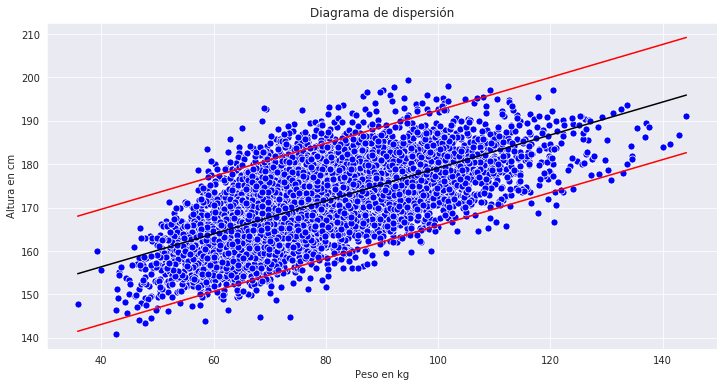

In [21]:
# Importamos la función que nos permite obtener los intervalos de confianza de nuestro modelo ya entrenado
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Guardamos en las variables iv_l y iv_u los intervalos de confianza
prstd, iv_l, iv_u = wls_prediction_std(mod)

with sns.axes_style('darkgrid'):
    plt.figure(figsize=(12,6))
    sns.scatterplot(data = data, x = 'weightkg', y = 'stature', color = 'blue', s = 50)
    sns.lineplot(x = data['weightkg'], y=iv_u, color='red', ls='-')
    sns.lineplot(x = data['weightkg'], y=iv_l, color='red', ls='-')
    sns.lineplot(x = data['weightkg'], y=data['weightkg'].values * mod.params[1] + mod.params[0] , color='black', ls='-')
    plt.title('Diagrama de dispersión')
    plt.ylabel('Altura en cm')
    plt.xlabel('Peso en kg')
    plt.grid(True)


***
# Extrapolación y Causalidad 

Es imporante saber que las predicciones o estimaciones solo deben hacerse para el rango en que tenemos definida la variable explicativa, si extrapolamos el modelo a valores fuera de rango corremos el riesgo de llegar a resultados absurdos.

Por ejemplo si estimamos el peso de una persona de 300Kg o un recien nacido de 3Kg con nuestro modelo anterior obtendremos lo siguiente: 

In [22]:
pred.summary_frame(alpha=0.05).loc[:,['mean', 'obs_ci_lower', 'obs_ci_upper']]

,mean,obs_ci_lower,obs_ci_upper
0,167.753938,154.498451,181.009425


En este caso tendriamos a un gigante de 255 cm y a un bebé muy alto de 152 cm.

Por último también cabe mencionar que el modelo de regresión solo nos muestra una **relación entre las variables pero no una causalidad.**

Este modelo de Altura y Peso es perfecto para entender la causalidad ya que por ejemplo una persona bajita por mucho que coma y engorde no va a aumentar su altura.


***
# Ejemplos

## Ejemplo de mal uso

Retomando el gráfico de la parábola anterior en la que no tiene mucho sentido representarla por una recta, veamos lo que ocurre si hacemos un modelo de regresión lineal.

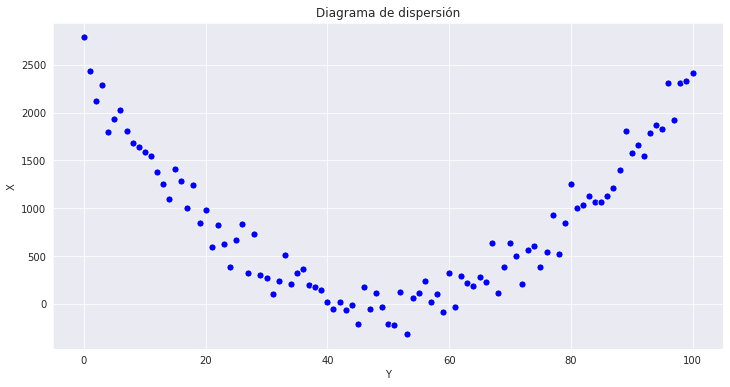

In [23]:
x = np.arange(0, 101)
y = (np.arange(-50, 51)**2).astype(np.float) + np.random.normal(0, 200, 101)
ejemplo = pd.DataFrame(np.array([x, y]).T, columns=['X','Y'])

with sns.axes_style('darkgrid'):
    plt.figure(figsize=(12,6))
    sns.scatterplot(data = ejemplo, x = 'X', y = 'Y', color = 'blue', s = 50)
    plt.title('Diagrama de dispersión')
    plt.ylabel('X')
    plt.xlabel('Y')
    plt.grid(True) 

In [24]:
mod2 = sm.OLS(ejemplo['Y'], sm.add_constant(ejemplo['X'].values.reshape(-1,1))).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                  0.003478
Date:                Sun, 10 May 2020   Prob (F-statistic):              0.953
Time:                        23:36:27   Log-Likelihood:                -813.93
No. Observations:                 101   AIC:                             1632.
Df Residuals:                      99   BIC:                             1637.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        836.9877    152.627      5.484      0.0

Tenemos un R-cuadrado ajustado de próximo a 0 por lo cuál el modelo ya sería inválido.

Además el p-valor de x es muy alto y por tanto no hay significatividad ni conjunta ni individual. 'x' no influye nada en los valores que toma 'y'.

Si modificamos un poco esos datos y tomamos solamente media parabola, por ejemplo:   

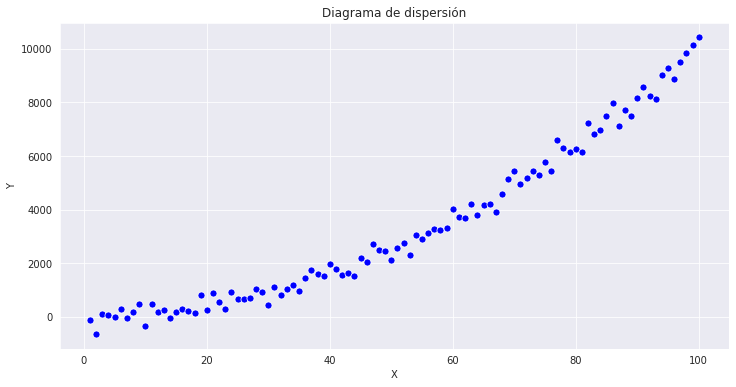

In [25]:
x = np.arange(1, 101)
y = (np.arange(1, 101)**2).astype(np.float) + np.random.normal(0, 300, 100)
ejemplo2 = pd.DataFrame(np.array([x, y]).T, columns=['X','Y'])

with sns.axes_style('darkgrid'):
    plt.figure(figsize=(12,6))
    sns.scatterplot(data = ejemplo2, x = 'X', y = 'Y', color = 'blue', s = 50)
    plt.title('Diagrama de dispersión')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.grid(True) 

Podemos ver que esta gráfica se puede ajustar mucho mejor a una recta pero veamos lo que ocurre cuando hacemos el modelo: 


In [26]:
mod3 = sm.OLS(ejemplo2['Y'], sm.add_constant(ejemplo2['X'].values.reshape(-1,1))).fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1295.
Date:                Sun, 10 May 2020   Prob (F-statistic):           2.74e-58
Time:                        23:36:28   Log-Likelihood:                -811.14
No. Observations:                 100   AIC:                             1626.
Df Residuals:                      98   BIC:                             1631.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1731.6420    164.132    -10.550      0.0

El R-cuadrado ajustado es de 0.927 que es bastante bueno y tenemos significatividad conjunta e individual con p-valores de <2e-16, hasta aquí el modelo parece perfecto pero si estudiamos los residuos y vemos los gráficos tenemos:

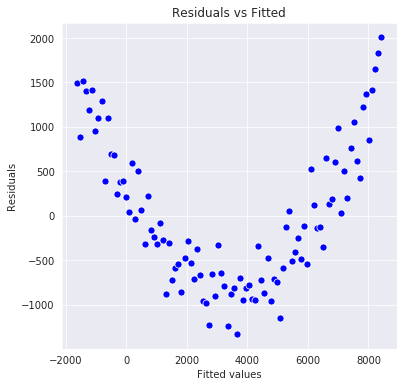

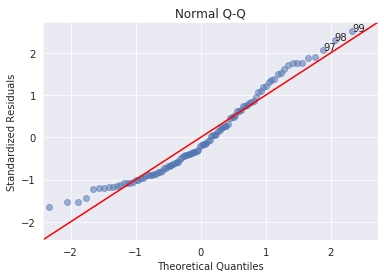

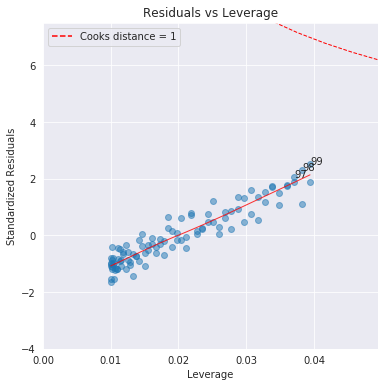

In [27]:
get_error_graphs(mod3)

En el primer gráfico vemos que los errores no son independientes, siguen una trayectoria parabólica.

Los errores no se ajustan muy bien a la recta en el gráfico Normal Q-Q por lo que tampoco son normales.

Por tanto este modelo tampoco es válido.

Si graficamos la recta con los intervalos de confianza vemos como nuestro modelo falla en los extremos.

In [28]:
# predecimos y guaramos en las variables iv_l y iv_u los intervalos de confianza
prstd, iv_l, iv_u = wls_prediction_std(mod3)   

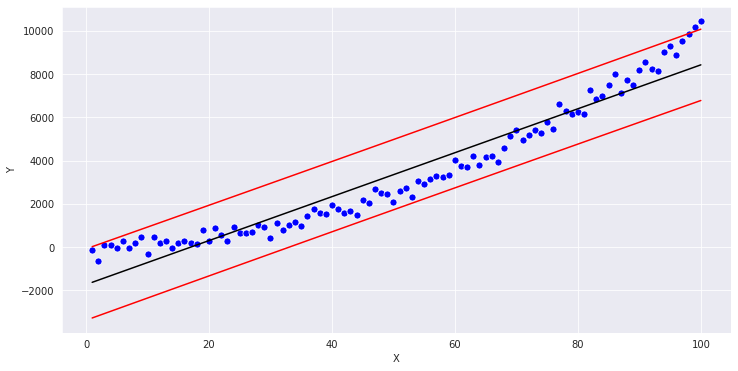

In [29]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(12,6))
    sns.scatterplot(data = ejemplo2, x = 'X', y = 'Y', color = 'blue', s = 50)
    sns.lineplot(x = ejemplo2['X'], y=iv_l, color='red', ls='-')
    sns.lineplot(x = ejemplo2['X'], y=iv_u, color='red', ls='-')
    sns.lineplot(x = ejemplo2['X'], y=ejemplo2['X'].values * mod3.params[1] + mod3.params[0] , color='black', ls='-')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.grid(True)

## Ejemplo de caso ideal


He generado dos variables (Y y X) que están relacionados de esta manera:

$$
Y = 50 + 3X + \epsilon
$$

In [30]:
x = np.arange(1,101)
y = np.arange(1,101)*3 + 50 + np.random.normal(0,30,100)
ejemplo3 = pd.DataFrame(np.array([x,y]).T, columns=['X','Y'])

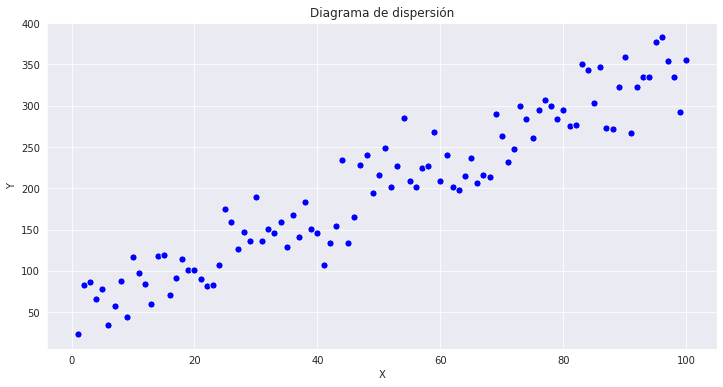

In [31]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(12,6))
    sns.scatterplot(data = ejemplo3, x = 'X', y = 'Y', color = 'blue', s = 50)
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.title('Diagrama de dispersión')
    plt.grid(True)

Vemos con el diagrama de dispersión que se puede ajustar claramente por una recta.

Hacemos el modelo:

In [32]:
mod4 = sm.OLS(ejemplo3['Y'], sm.add_constant(ejemplo3['X'].values.reshape(-1,1))).fit()
print(mod4.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     900.0
Date:                Sun, 10 May 2020   Prob (F-statistic):           3.46e-51
Time:                        23:36:32   Log-Likelihood:                -478.02
No. Observations:                 100   AIC:                             960.0
Df Residuals:                      98   BIC:                             965.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.2752      5.868      8.227      0.0

Podemos ver como las estimaciones de los coeficientes prácticamente coinciden con la fórmula empleada para crear los datos.

Vemos como el R-cuadrado es bastante alto, no llega a ser 1 por los errores aleatorios que hemos metido para generar las observaciones.

Hay significatividad individual y conjunta.

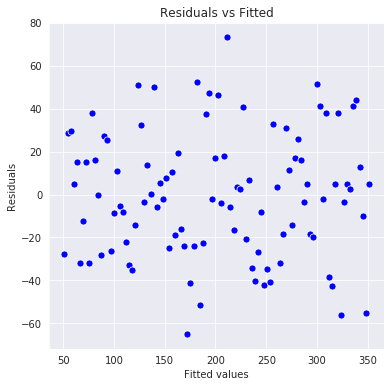

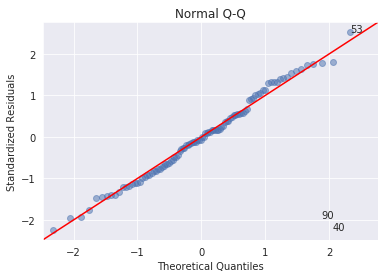

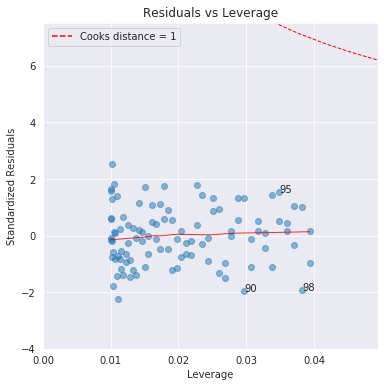

In [33]:
get_error_graphs(mod4)



Los residuos son claramente aleatorios y se ajustan bastante bien a la recta normal en el Q-Q plot.

El modelo cumple todas las hipótesis y por tanto es un modelo válido.

In [34]:
# predecimos y guaramos en las variables iv_l y iv_u los intervalos de confianza
prstd, iv_l, iv_u = wls_prediction_std(mod4)   

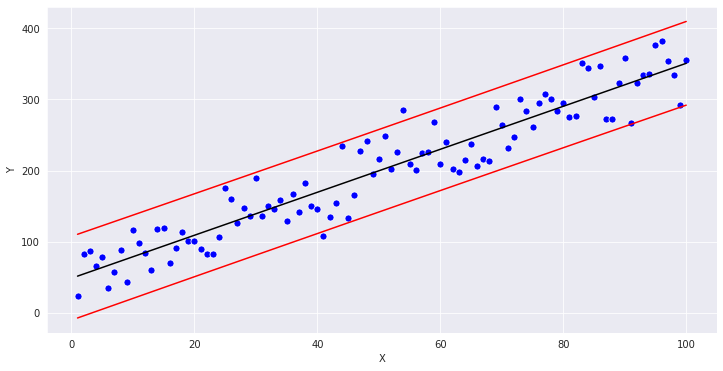

In [35]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(12,6))
    sns.scatterplot(data = ejemplo3, x = 'X', y = 'Y', color = 'blue', s = 50)
    sns.lineplot(x = ejemplo3['X'], y=iv_l, color='red', ls='-')
    sns.lineplot(x = ejemplo3['X'], y=iv_u, color='red', ls='-')
    sns.lineplot(x = ejemplo3['X'], y=ejemplo3['X'].values * mod4.params[1] + mod4.params[0] , color='black', ls='-')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.grid(True) 


Vemos como dentro de las bandas de confianza queda aproximadamente el 95% de las observaciones.

## Ejemplos con Outliers

En este ejemplo hemos metido 5 outliers (valores atípicos) y hacemos el modelo directamente.

In [36]:
dataOut = data[['stature', 'weightkg']]

i = 5
stature = np.array([750 for a in range(0,i)]) + np.random.normal(0,5,i)
weightkg = np.array([0 for a in range(0,i)]) + np.random.normal(0,5,i)
out = pd.DataFrame(np.array([stature, weightkg]).T, columns=['stature', 'weightkg'])

out_l = pd.concat([dataOut, out], axis = 0)

In [37]:
mod = sm.OLS(out_l['stature'], sm.add_constant(out_l['weightkg'].values.reshape(-1,1))).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                stature   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     210.0
Date:                Sun, 10 May 2020   Prob (F-statistic):           8.34e-47
Time:                        23:36:36   Log-Likelihood:                -26323.
No. Observations:                6073   AIC:                         5.265e+04
Df Residuals:                    6071   BIC:                         5.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        154.6322      1.216    127.176      0.0

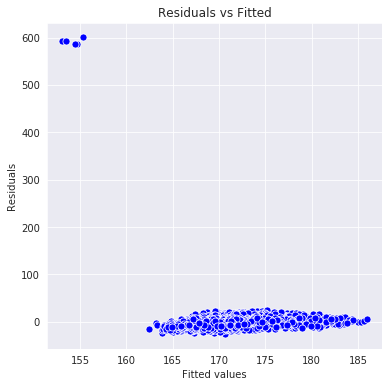

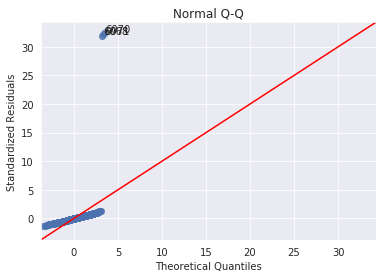

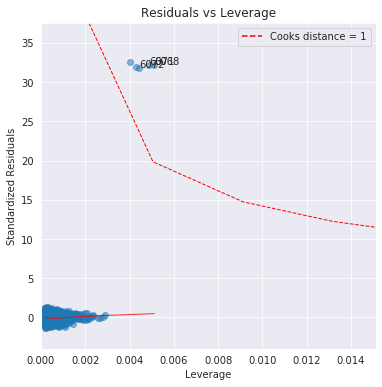

In [38]:
get_error_graphs(mod)


En este caso el R-cuadrado ajustado se ha ido prácticamente a 0.

Al hacer plot del modelo vemos claramente observaciones con distancia de Cook mayor que 1.


Si empezamos desde el principio y hacemos los histogramas de las variables tendriamos lo siguiente:

count    6073.000000
mean       79.642087
std        15.821462
min        -7.150069
25%        68.200000
50%        78.500000
75%        89.600000
max       144.200000
Name: weightkg, dtype: float64

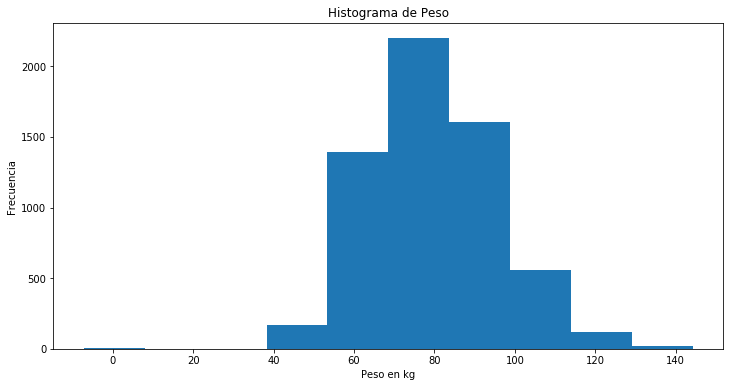

In [39]:
figure = plt.figure(figsize = (12,6))
plt.hist(out_l['weightkg'])
plt.title('Histograma de Peso');
plt.xlabel('Peso en kg');
plt.ylabel('Frecuencia');
out_l['weightkg'].describe()

count    6073.000000
mean      171.913610
std        18.776319
min       140.900000
25%       165.200000
50%       171.900000
75%       177.900000
max       755.393543
Name: stature, dtype: float64

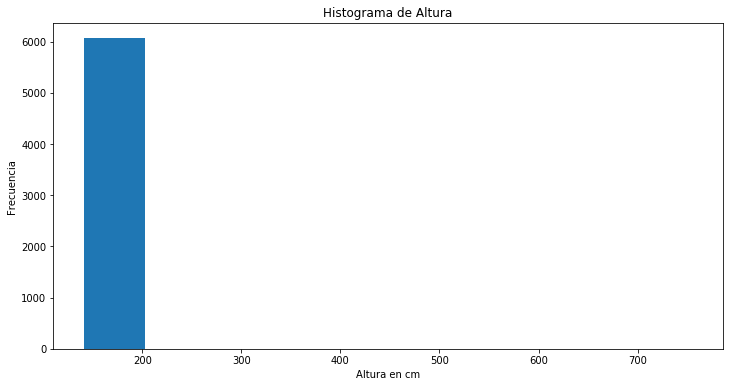

In [40]:
figure = plt.figure(figsize = (12,6))
plt.hist(out_l['stature'])
plt.title('Histograma de Altura');
plt.xlabel('Altura en cm');
plt.ylabel('Frecuencia');
out_l['stature'].describe()

Estos histogramas ya nos indican que hay algo raro en la base de datos y se tenía que haber arreglado de antemano.

Igualmente si empezamos dibujando el diagrama de dispersión hubiesemos podido ver los outliers a simple vista:


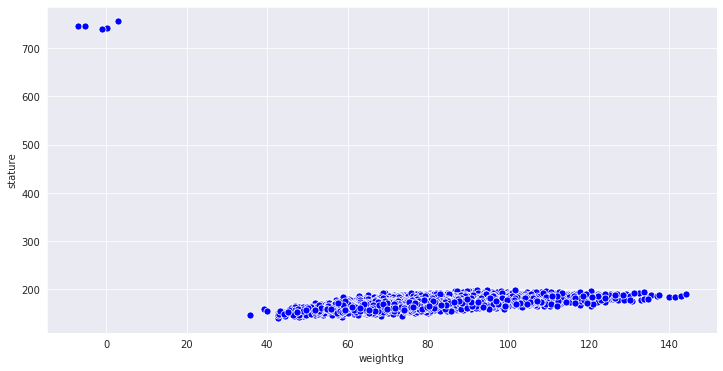

In [41]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(12,6))
    sns.scatterplot(data = out_l, x = 'weightkg', y = 'stature', color = 'blue', s = 50)
    plt.ylabel('stature')
    plt.xlabel('weightkg')
    plt.grid(True)

Si en lugar de meter 5 outliers metemos 50


In [42]:
dataOut = data[['stature', 'weightkg']]

i = 50
stature = np.array([750 for a in range(0,i)]) + np.random.normal(0,5,i)
weightkg = np.array([0 for a in range(0,i)]) + np.random.normal(0,5,i)
out = pd.DataFrame(np.array([stature, weightkg]).T, columns=['stature', 'weightkg'])

out_l = pd.concat([dataOut, out], axis = 0)

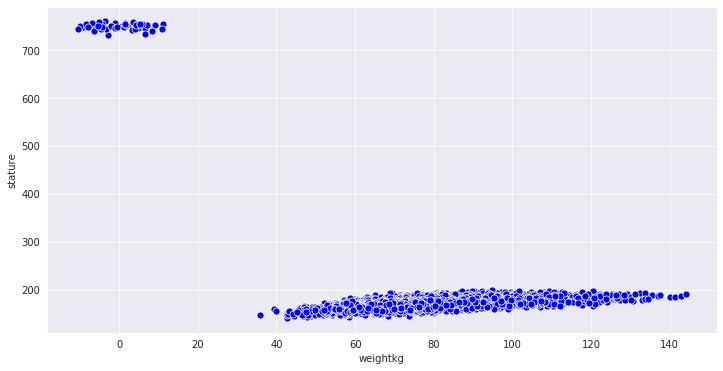

In [43]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(12,6))
    sns.scatterplot(data = out_l, x = 'weightkg', y = 'stature', color = 'blue', s = 50)
    plt.ylabel('stature')
    plt.xlabel('weightkg')
    plt.grid(True)

In [44]:
mod = sm.OLS(out_l['stature'], sm.add_constant(out_l['weightkg'].values.reshape(-1,1))).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                stature   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     657.4
Date:                Sun, 10 May 2020   Prob (F-statistic):          8.36e-138
Time:                        23:36:43   Log-Likelihood:                -32636.
No. Observations:                6118   AIC:                         6.528e+04
Df Residuals:                    6116   BIC:                         6.529e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        251.8636      3.021     83.363      0.0

En este caso el modelo nos devuelve el coeficiente del Peso como negativo, esto quiere decir que a mayor peso menor altura lo cual no cuadra con nuestras observaciones en la vida real.

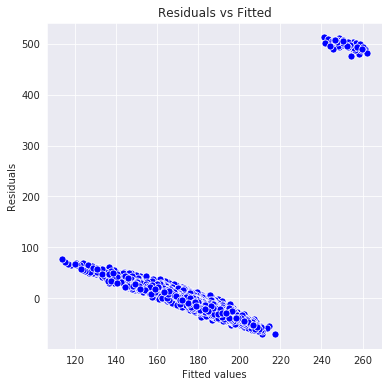

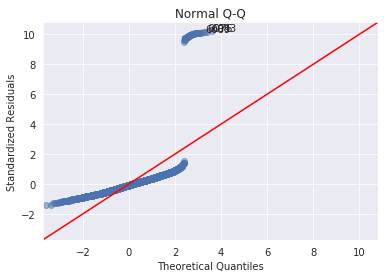

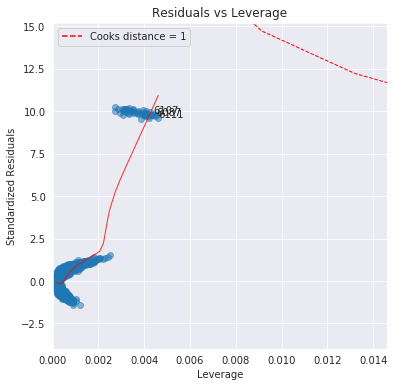

In [45]:
get_error_graphs(mod)

Ahora no hay ningún punto con distancia de Cook mayor que 1, esto se debe a que al ser muchos outliers estos dejan de ser outlier por definición y empiezan a considerarse parte de la distribución, de aquí la importancia de no solo fijarse en la distancia de Cook y revisar previamente la base de datos.

Es importante aplicar varias técnicas para detectar los outliers y aplicar el sentido común, en este caso los 50 outliers sabemos que son datos erroneos porque no puede haber personas que pesen 0 Kg y midan cerca de 7 metros con lo que podemos borrar tranquilamente esas obervaciones de la base de datos.


# Regresión Lineal Múltiple

En regresión lineal múltiple se aplican los mismos principios que en la regresión lineal simple con la diferencia de que se añaden más variables explicativas.

Ya tenemos nuestro primer modelo que relaciona la altura con el peso pero hemos visto que el R-cuadrado es muy bajo y es posible que existan variables que ayuden a explicar mejor el resto de la variabilidad.

Al añadir más variables explicativas ya estariamos hablando de regresión lineal múltiple, en nuestro ejemplo la edad o el género son variables que pueden servirnos para hacer una estimación mejor.

Necesitamos antes de nada convertir a numéricas aquellas variables que sean categóricas. En este caso, creamos las columnas Gender_Female y Gender_Male a partir de Gender, a través de la función de pandas get_dummies.


In [46]:
data_dummies = pd.get_dummies(data, columns=['Gender'])

In [47]:
mod5 = sm.OLS(data_dummies['stature'], sm.add_constant(data_dummies[['weightkg','Age','Gender_Female']].values)).fit()
print(mod5.summary())
 

                            OLS Regression Results                            
Dep. Variable:                stature   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     2810.
Date:                Sun, 10 May 2020   Prob (F-statistic):               0.00
Time:                        23:36:48   Log-Likelihood:                -19300.
No. Observations:                6068   AIC:                         3.861e+04
Df Residuals:                    6064   BIC:                         3.863e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.2787      0.515    303.532      0.0

Podemos ver como todas las variables son significativas y que hay significatividad conjunta, el R-cuadrado ajustado ha mejorado de 0,43 a 0,58 el cual sigue siendo bajo pero empieza a ser aceptable.

Ahora la fórmula para estimar la Altura de una persona quedaría de la siguiente forma:

$$
Altura = 156.2787 + 0.2594*Peso - 0.0942*Edad - 8.2802 * GeneroFemenino
$$

Aquí podemos ver que la edad tiene signo negativo (relación inversa), esto quiere decir que a mayor edad menor estatura.


Por ejemplo, a mayor experiencia en una actividad menos tiempo se tarda en realizarla, el diagrama de dispersión se graficaría de esta forma:  

<Figure size 1008x432 with 0 Axes>

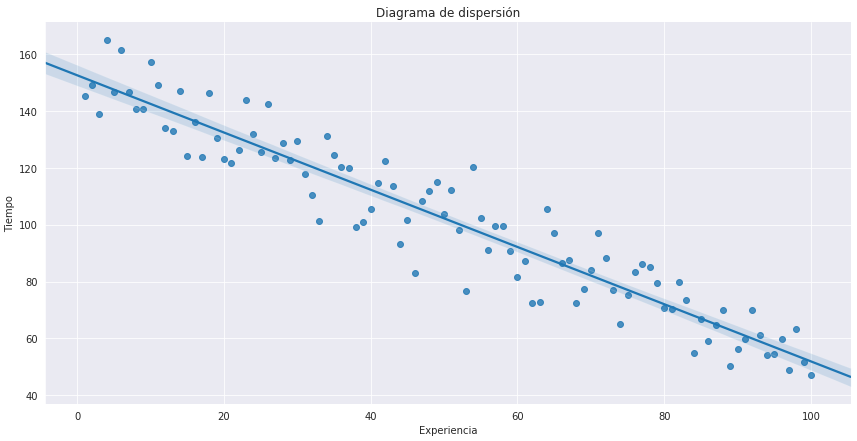

In [48]:
x = np.arange(1,101)
y = np.arange(1, 101)[::-1] + 50 + np.random.normal(0,10,100)
ejemplo4 = pd.DataFrame(np.array([x,y]).T, columns=['x','y'])

with sns.axes_style('darkgrid'):
    plt.figure(figsize=(14,6));
    g1 = sns.lmplot(data = ejemplo4, x = 'x', y = 'y', height = 6 , aspect = 2);
    plt.ylabel('Tiempo')
    plt.xlabel('Experiencia')
    plt.title('Diagrama de dispersión')

    plt.grid(True)


Recordemos que la regresión lineal no indica causalidad, lo normal sería pensar que según nos hacemos mayores vamos perdiendo altura (y según algunos estudios esto es verdad a partir de los 40 años aprox.) pero también puede deberse a que las nuevas generaciones estan siendo más altas, o una mezcla de estos o cualquier otro motivo. Hay que mantener la mente abierta.


En los coeficientes vemos como aparece GenderFemale pero no tenemos GenderMale, esto se debe a que el Género es una variable categórica (factor) que toma dos posibles niveles (Male o Female) y en este caso ha tomado Male como base. El resto de niveles que no sean la base se tratan como si fuesen variables binarias y sus coeficientes hay que compararlos con la base, en este caso GenderFemale tomará el valor 1 cuando la persona es mujer y 0 en caso contrario.

El coeficiente GenderFemale de nuestro modelo nos dice que una Mujer en media medirá 8.28 cm menos que un Hombre (nivel base).

Veamos los residuos:

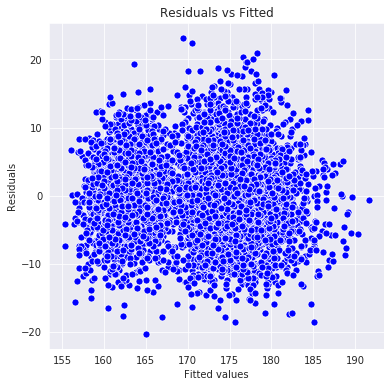

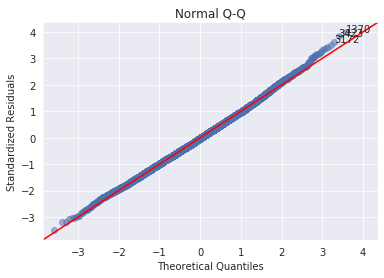

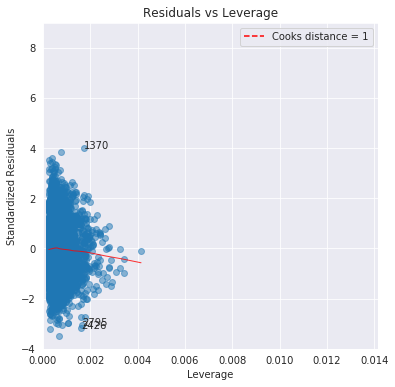

In [49]:
get_error_graphs(mod5)

Los errores siguien siendo independientes, homocedasticos y normales.


Tenemos que la estimación de la altura de una chica de 28 años y 55Kg sería:

In [50]:
pred = mod5.get_prediction(sm.add_constant(np.array([1, 55, 28, 1]).reshape(-1,4)))

pred.summary_frame(alpha=0.05).loc[0,['mean', 'obs_ci_lower', 'obs_ci_upper']]


mean            159.626753
obs_ci_lower    148.206094
obs_ci_upper    171.047413
Name: 0, dtype: float64


159 cm y se encontrará entre 148 y 171cm el 95% de las veces.


# Multicolinealidad

Una de las hipótesis del modelo de regresión múltiple es que las variables regresoras o explicativas deben ser independientes entre si (no deben estar correladas), para comprobar si hay multicolinealidad en el modelo usamos el VIF (Factores de Inflación de la Varianza), cuando el VIF es menor de 10 en todas las variables entonces no hay problemas de multicolinealidad.

In [51]:
dataAux = data_dummies[['weightkg', 'Age', 'Gender_Female']] 


In [52]:
# Importamos las librerias que nos facilitan obtener el VIF
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Especificamos las variables que usamos para entrenar el modelo 
features = "+".join(dataAux.columns)
y, X = dmatrices('stature ~' + features, pd.concat([dataAux,data['stature']],axis=1), return_type='dataframe')

# Sacamos los datos en formato dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,47.425103,Intercept
1,1.472998,weightkg
2,1.059732,Age
3,1.402423,Gender_Female



De momento no hay multicolinealidad con las variables Peso, Edad y Genero ya que todos los VIF son menores de 2.

En la base de datos contamos con unas 100 variables distintas de cada persona, veamos la correlación que hay entre algunas de ellas:     

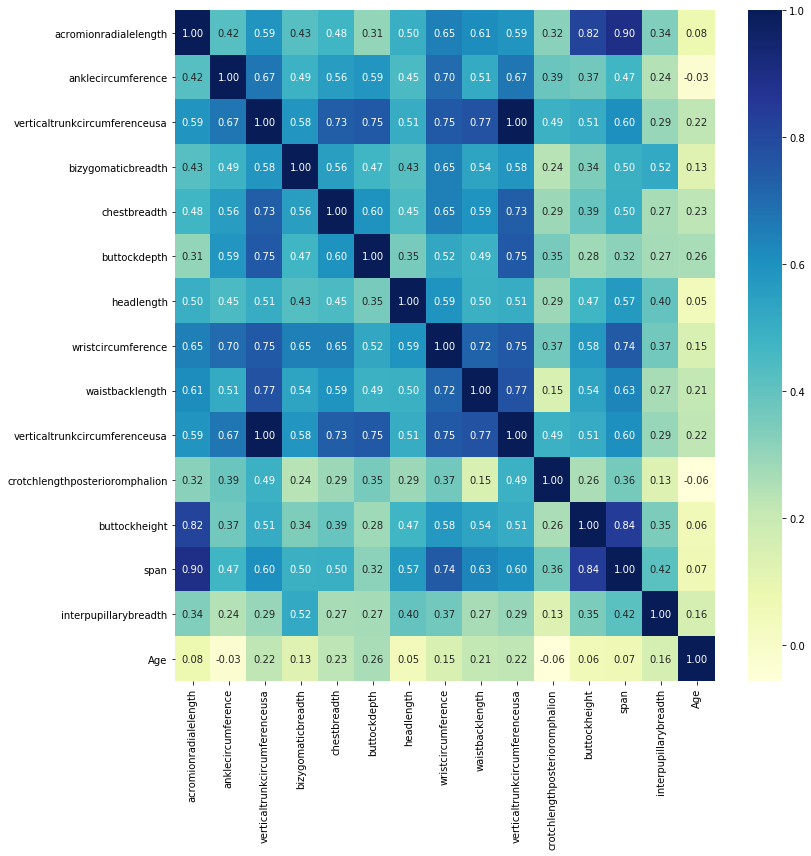

In [53]:
np.seed = 123456

columns = np.random.choice([a for a in range (1,94)], 14).tolist()
columns = columns + [104]  
                                                                     
dataAux = data.iloc[:,columns]
figure=plt.figure(figsize=(12,12))
g1=sns.heatmap(dataAux.corr(), annot = True, fmt ='.2f', cbar = True, cmap = 'YlGnBu')
plt.tight_layout()



Los cuadrados más oscuros indican una correlacion positiva más alta entre las variables y, los más claros el caso contrario.

Veamos lo que ocurre si agregamos dos variables muy correladas entre si, por ejempo suprasternaleheight y cervicaleheight.

El modelo sería el siguiente:


In [54]:
mod5 = sm.OLS(data_dummies['stature'], sm.add_constant(data_dummies[['weightkg','Age','Gender_Female', 
                                                                     'suprasternaleheight','cervicaleheight']].values)).fit()
print(mod5.summary())

                            OLS Regression Results                            
Dep. Variable:                stature   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 9.309e+04
Date:                Sun, 10 May 2020   Prob (F-statistic):               0.00
Time:                        23:37:05   Log-Likelihood:                -8733.7
No. Observations:                6068   AIC:                         1.748e+04
Df Residuals:                    6062   BIC:                         1.752e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8993      0.340     37.892      0.0

Estas dos nuevas variables explican en gran medida la variabilidad de la altura ya que estan muy relacionadas con ella y por tanto alcanzamos un R-cuadrado ajustado de 0.987.

Todas las variables del modelo son significativas y hay significativadad conjunta.

Si vemos la multicolinealidad:


In [55]:
#Especificamos las variables que usamos para entrenar el modelo 
features = "+".join(data_dummies[['weightkg','Age','Gender_Female', 'suprasternaleheight','cervicaleheight']].columns)
y, X = dmatrices('stature ~' + features, pd.concat([data_dummies[['weightkg','Age',
                                                                  'Gender_Female', 'suprasternaleheight','cervicaleheight']],
                                                    data['stature']],axis=1), return_type='dataframe')

# Sacamos los datos en formato dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif


,VIF Factor,features
0,674.454447,Intercept
1,2.098331,weightkg
2,1.073298,Age
3,1.976984,Gender_Female
4,50.878500,suprasternaleheight
5,52.640298,cervicaleheight


Como suprasternaleheight y cervicaleheight son muy superiores a 10 nos enfrentamos a un problema de multicolinealidad en nuestro modelo.

Para solucionar esto haría falta hacer una regresión lineal parcial o ridge regresión pero esos temas se escapan de nuestros objetivos.

Simplemente hay que tener en cuenta que los coeficientes ya no pueden ser interpretados con normalidad y que el modelo es muy sensible a la hora de hacer estimaciones (deja de ser robusto).

Una solución sencilla es quitar una de las variables con problema de multicolinealidad, con el claro inconveniente de perder la información extra que nos aporta esa variable, así obtenemos lo siguiente:


In [56]:
mod5 = sm.OLS(data_dummies['stature'], sm.add_constant(data_dummies[['weightkg','Age','Gender_Female', 
                                                                     'suprasternaleheight']].values)).fit()
print(mod5.summary())

                            OLS Regression Results                            
Dep. Variable:                stature   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 7.925e+04
Date:                Sun, 10 May 2020   Prob (F-statistic):               0.00
Time:                        23:37:06   Log-Likelihood:                -9881.3
No. Observations:                6068   AIC:                         1.977e+04
Df Residuals:                    6063   BIC:                         1.981e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.7714      0.406     38.849      0.0

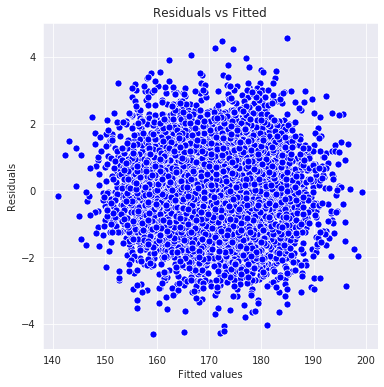

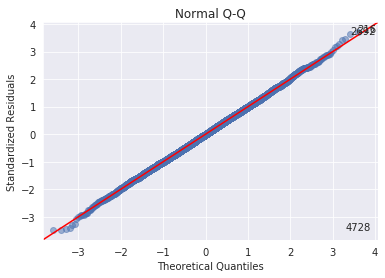

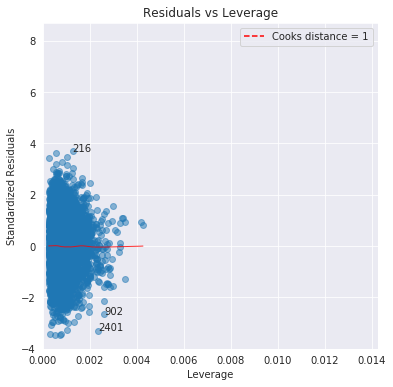

In [57]:
get_error_graphs(mod5)


En este modelo se cumple todo lo necesario para tener un modelo válido incluida la multicolinealidad.

Cabe observar también que el hecho de quitar la variable cervicaleheight ha hecho que cambie de forma significativa el coeficiente de suprasternaleheight.

Si hacemos alguna predicción podemos ver que los intervalos de confianza son menos amplios que antes.

In [58]:
pred = mod5.get_prediction(sm.add_constant(np.array([1, 55, 28, 1, 1350]).reshape(-1,5)))
pred.summary_frame(alpha=0.05).loc[0,['mean', 'obs_ci_lower', 'obs_ci_upper']]


mean            165.485946
obs_ci_lower    163.066727
obs_ci_upper    167.905164
Name: 0, dtype: float64

***
# Stepwise Algorithm

Cuando tenemos demasidas variables se vuelve muy complicado saber que variables incluir en el modelo y cuales no.

Recordemos que un modelo debe estar bien especificado, no deben faltar variables ni haber variables redundantes, por lo que meter todas las variables que tenemos rara vez es una buena solución y estar probando a mano todas los posibles modelos se puede convertir en una labor interminable en caso de tener muchas variables.

Para ayudarnos a seleccionar las variables tenemos la función 'step()' que utiliza el algoritmo Stepwise.

El algoritmo stepwise es un proceso iterativo en el que va añadiendo a un modelo la variable que más ayuda a explicar la variabilidad en función de las variables que ya se han incluido en el modelo (método forward) o también puede partir de un modelo con todas las variables e ir quitando las que no aportan nada a la explicación de la variabilidad (backward) o una mezcla de ambos metodos.

Para utilizar la función step debemos indicarle un modelo inicial y las variables que puede utilizar el modelo.

In [59]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    '''
    data: conjunto completo de datos
    response: la variable dependiente
    '''
    # Creamos un set (conjunto con valores unicos) con todas las caracteríticas a evaluar y quitamos la variable dependiente
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        # Recorremos cada uno de los valores que aún existen en remaining
        # Para cada uno de ellos, entrenamos el modelo y guardamos la metrica que se desee (en este caso aic) 
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().aic
            scores_with_candidates.append((score, candidate))
            
        # Ordenamos de mayor a menor
        scores_with_candidates.sort(reverse = True)
        # Nos quedamos con la mejor opción
        best_new_score, best_candidate = scores_with_candidates.pop()
        print(best_new_score)
        # En caso de que el nuevo valor sea inferior que el almacenado actualmente, lo guardamos como seleccionado y
        # actualizamo el mejor valor
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    # Finalmente devolvemos el modelo con la formula definida por la lista de seleccionados cuando ya no existan mas
    # cartactesísticas en el remanining, o el valor obtenido es inferior al anteriormente almacenado
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model   


In [60]:
modelSW = forward_selected(data.loc[:, ['acromialheight' , 'acromionradialelength' ,
    'anklecircumference' , 'axillaheight' , 'balloffootcircumference' ,
    'balloffootlength' , 'biacromialbreadth' , 'bicepscircumferenceflexed' , 
    'bicristalbreadth', 'bideltoidbreadth' , 'bimalleolarbreadth' , 
    'bitragionchinarc' , 'bitragionsubmandibulararc' , 'bizygomaticbreadth' , 
    'buttockcircumference' , 'buttockdepth' , 'buttockheight' , 'buttockkneelength' , 
    'buttockpopliteallength' , 'calfcircumference' , 'cervicaleheight' , 
    'chestbreadth' , 'chestcircumference' , 'chestdepth' , 'chestheight' , 
    'crotchheight' , 'crotchlengthomphalion', 'crotchlengthposterioromphalion' , 
    'earbreadth' , 'earlength' , 'earprotrusion' , 'elbowrestheight' , 
    'eyeheightsitting' , 'footbreadthhorizontal' , 'footlength' , 'forearmcenterofgriplength' , 
    'forearmcircumferenceflexed' , 'forearmforearmbreadth' , 'forearmhandlength' , 
    'functionalleglength' , 'handbreadth' , 'handcircumference' , 'handlength' ,
    'headbreadth' , 'headcircumference' , 'headlength' , 'heelanklecircumference' , 
    'heelbreadth' , 'hipbreadth' , 'hipbreadthsitting' , 'iliocristaleheight' , 
    'interpupillarybreadth' , 'interscyei' , 'interscyeii' , 'kneeheightmidpatella' , 
    'kneeheightsitting' , 'lateralfemoralepicondyleheight' , 'lateralmalleolusheight' , 
    'lowerthighcircumference' , 'mentonsellionlength' , 'neckcircumference' , 
    'neckcircumferencebase' , 'overheadfingertipreachsitting' , 'palmlength' , 
    'poplitealheight' , 'radialestylionlength' , 'shouldercircumference' , 
    'shoulderelbowlength' , 'shoulderlength' , 'sittingheight' , 'sleevelengthspinewrist' , 
    'sleeveoutseam' , 'span' , 'stature' , 'suprasternaleheight' ,'tenthribheight' , 
    'thighcircumference' , 'thighclearance' , 'thumbtipreach' , 'tibialheight' , 
    'tragiontopofhead' , 'trochanterionheight' , 'verticaltrunkcircumferenceusa' , 
    'waistbacklength' , 'waistbreadth' , 'waistcircumference' , 'waistdepth' , 
    'waistfrontlengthsitting' , 'waistheightomphalion' , 'weightkg' , 
    'wristcircumference' , 'wristheight' , 'Gender' ,'SubjectsBirthLocation' , 
    'SubjectNumericRace' , 'Ethnicity' , 'Age' , 'WritingPreference']], 'stature')


10360.582942742467
4643.974499477801
4168.112964363035
3711.9908758559927
3414.574084417528
3239.1260272370546
3089.6483681940417
2992.0240619995075
2921.462218150844
2853.488186415384
2815.5176083566766
2780.6686124804287
2746.96420862717
2720.685032526162
2703.3339528715414
2686.710072915219
2677.949153519051
2665.0956749020206
2652.0746148833305
2644.007047444626
2637.090353226031
2620.3539982670527
2608.279851727284
2593.8153613147315
2582.515351537326
2575.8942775891746
2571.2695874916153
2565.56231126904
2562.0745620360203
2560.167548214025
2558.6734562080246
2557.248300414958
2555.949972118009
2554.6459959432705
2553.8799629984296
2552.753073680863
2551.0734260105046
2550.3584888883643
2549.837519701835
2549.527388950782
2549.121205259241
2548.9245593250625
2548.5049424804
2547.910455020709
2547.445592691393
2547.3621655725933
2547.3780603018467


In [61]:
print(modelSW.summary())

                            OLS Regression Results                            
Dep. Variable:                stature   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1459.
Date:                Sun, 10 May 2020   Prob (F-statistic):               0.00
Time:                        23:56:50   Log-Likelihood:                -1018.7
No. Observations:                1421   AIC:                             2547.
Df Residuals:                    1166   BIC:                             3888.
Df Model:                         254                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

C:\Users\Nacho\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:695: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
C:\Users\Nacho\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Nacho\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Nacho\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


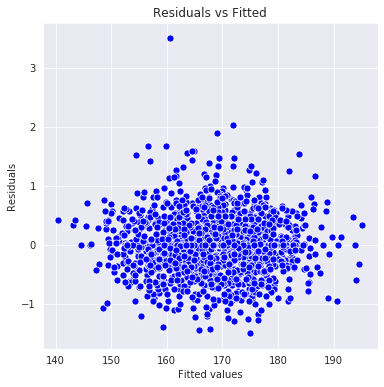

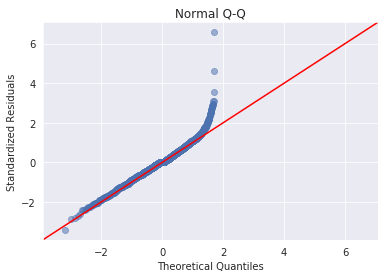

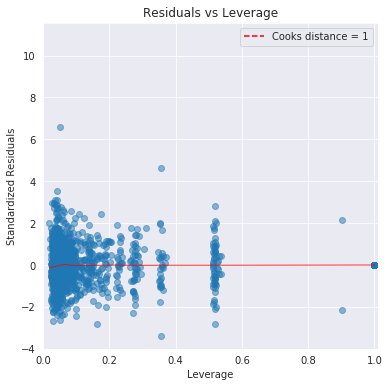

In [62]:
get_error_graphs(modelSW)

Podemos ver como el stepwise nos ha elegido automáticamente las variables, el problema es que es muy probable que tengamos multicolineadad y habrá que tener cuidado a la hora de interpretar los coeficientes, sin embargo, el modelo ha mejorado considerablemente y hace unas predicciones con un margen de error muy bajo.

In [63]:
# predecimos y guaramos en las variables iv_l y iv_u los intervalos de confianza
prstd, iv_l, iv_u = wls_prediction_std(modelSW) 

(iv_u.values - iv_l).mean()/2


1.1590413118771088


Con este modelo el 95% de las veces acertaremos con un error medio de +/- 1.15 cm.